# Pandas 3

## John Wilson

In [7]:
import pandas as pd
from pydataset import data
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


# Problem 1

In [8]:
diamonds=data("diamonds")
diamonds.columns.tolist()

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [9]:
set(diamonds['color'].tolist())

{'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [10]:
set(diamonds['cut'].tolist())

{'Fair', 'Good', 'Ideal', 'Premium', 'Very Good'}

In [11]:
set(diamonds['clarity'].tolist())

{'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'}

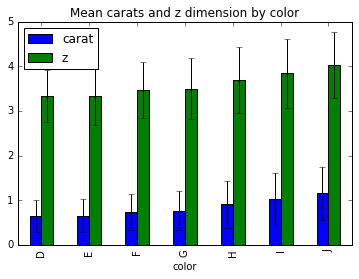

In [55]:
color = diamonds.groupby("color")
d = color.get_group("D")
g = color.get_group("G")
j = color.get_group("J")
means = color.mean()
errors = color.std()
means.loc[:,["carat", "z"]].plot(kind='bar', yerr=errors, \
                                     title="Mean carats and z dimension by color")
plt.show()

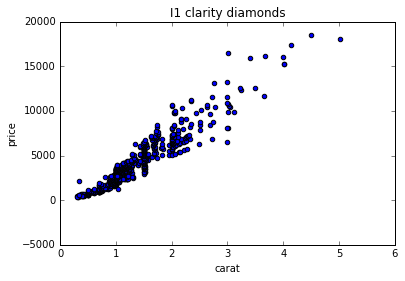

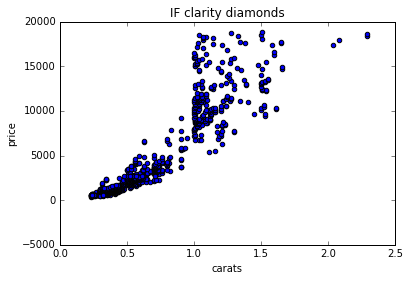

In [56]:
clarity = diamonds.groupby("clarity")
i1 = clarity.get_group("I1")
ifs = clarity.get_group("IF")


i1.plot(kind='scatter', x = 'carat', y = 'price', title="I1 clarity diamonds")
ax.set_xlabel("carats")
plt.show()
plt.close()

ifs.plot(kind='scatter', x = 'carat', y = 'price', title="IF clarity diamonds")
plt.xlabel("carats")
plt.show()
plt.close()

From the first graph, we can discover an interesting relationship primarily between color and size of diamond. The darker diamonds, which are generally considered to be worse, are larger on average. Similarly, they have the largest error. In the second graph, we discover the relationship between carat and price, as it varies from the most clear diamonds to the least clear. The IF diamonds, which are the best, tend to be not only smaller, but also much more valuable. There is a looser fit line than in the other case, perhaps because the greater value induces greater variablilty due to coloration.

# Problem 2

In [68]:
titanic = pd.read_csv('titanic.csv',header=0)[["Survived","Pclass","Sex","Age","Fare","Embarked"]]

In [69]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].mean())

In [71]:
titanic = titanic.dropna()

In [74]:
set(titanic['Embarked'].tolist())

{'C', 'Q', 'S'}

In [79]:
titanic.groupby("Embarked").mean()["Survived"]

Embarked
C    0.555556
Q    0.357724
S    0.332968
Name: Survived, dtype: float64

In [83]:
titanic.pivot_table('Survived',index=['Sex'],columns=['Embarked'])

Embarked,C,Q,S
Sex,,,
female,0.902655,0.616667,0.680412
male,0.305732,0.111111,0.170418


In [85]:
titanic.pivot_table('Survived',index=['Sex'],columns=['Embarked'],aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,113,60,291
male,157,63,622


In [87]:
age = pd.cut(titanic['Age'], [0,12,18,80])
titanic.pivot_table("Survived", index=["Sex",age], columns=['Embarked'], aggfunc='count')

Embarked             C     Q      S
Sex    Age                         
female (0, 12]     9.0   NaN   35.0
       (12, 18]   15.0   6.0   27.0
       (18, 80]   89.0  54.0  229.0
male   (0, 12]     7.0   5.0   38.0
       (12, 18]    6.0   NaN   45.0
       (18, 80]  144.0  58.0  539.0

In [88]:
age = pd.cut(titanic['Age'], [0,12,18,80])
titanic.pivot_table("Survived", index=["Sex",age], columns=['Embarked'])

Embarked                C        Q         S
Sex    Age                                  
female (0, 12]   0.888889      NaN  0.542857
       (12, 18]  0.800000  0.50000  0.777778
       (18, 80]  0.921348  0.62963  0.689956
male   (0, 12]   0.714286  0.00000  0.578947
       (12, 18]  0.333333      NaN  0.066667
       (18, 80]  0.284722  0.12069  0.150278

In [94]:
titanic.pivot_table("Survived",index=["Pclass"], columns=["Embarked"])

Embarked,C,Q,S
Pclass,,,
1.0,0.687943,0.666667,0.559322
2.0,0.571429,0.285714,0.417355
3.0,0.366337,0.353982,0.210526


It looks like the 1 class had the most survivors, and passengers from C were almost disproportionately assigned to the 1 class. This might explain the difference in survival rates between city C and the other two cities.